Parte 1: Juntar todas as imagens em uma única

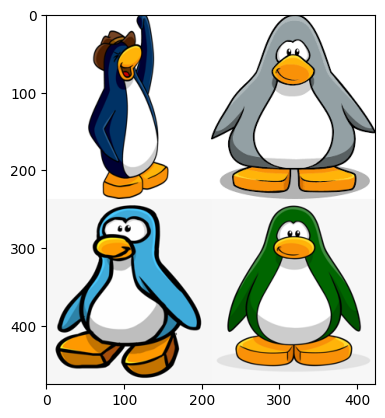

In [57]:

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def converter_para_rgb(image):
    return image if image.mode == 'RGB' else image.convert('RGB')


img1 = Image.open('P1.png')
img2 = Image.open('P2.png')
img3 = Image.open('P3.jpg')
img4 = Image.open('P4.png')

img1 = converter_para_rgb(img1)
img2 = converter_para_rgb(img2)
img3 = converter_para_rgb(img3)
img4 = converter_para_rgb(img4)

img1_arr = np.array(img1)
img2_arr = np.array(img2)
img3_arr = np.array(img3)
img4_arr = np.array(img4)

new_size = (min(img1_arr.shape[1], img2_arr.shape[1], img3_arr.shape[1], img4_arr.shape[1]),
            min(img1_arr.shape[0], img2_arr.shape[0], img3_arr.shape[0], img4_arr.shape[0]))

img1_resized = np.array(img1.resize(new_size))
img2_resized = np.array(img2.resize(new_size))
img3_resized = np.array(img3.resize(new_size))
img4_resized = np.array(img4.resize(new_size))

top_row = np.hstack((img1_resized, img2_resized))  
bottom_row = np.hstack((img3_resized, img4_resized))  

combined_image = np.vstack((top_row, bottom_row))

merged_img = Image.fromarray(combined_image)

plt.imshow(merged_img)

merged_img.save('pinguin_grupo.png')



Parte 2: Trocar as Cores


C:\Users\Thuli\AppData\Local\Temp\ipykernel_12584\1330816634.py:8: RuntimeWarning: overflow encountered in scalar subtract
  return np.abs(pixel[0] - pixel[1]) < tolerance and np.abs(pixel[1] - pixel[2]) < tolerance


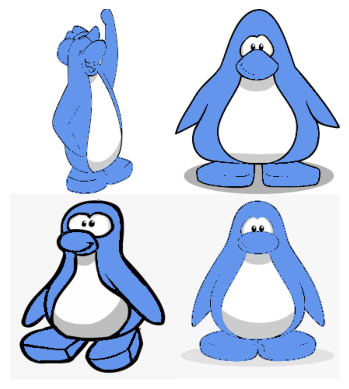

In [58]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img_np = np.array(merged_img)

def is_gray(pixel, tolerance=10):
    return np.abs(pixel[0] - pixel[1]) < tolerance and np.abs(pixel[1] - pixel[2]) < tolerance

mask = np.array([
    not (
        np.all(pixel == [255, 255, 255]) or  
        np.all(pixel == [0, 0, 0]) or        
        is_gray(pixel)                       
    ) for pixel in img_np.reshape(-1, 3)
]).reshape(img_np.shape[:2])

img_np[mask] = [100, 149, 237] 

result_img = Image.fromarray(img_np.astype('uint8'))

result_img.save('pinguin_grupo_cor.png')

plt.imshow(result_img)
plt.axis('off')
plt.show()


Parte 3: Aplicar o Espelhamento 

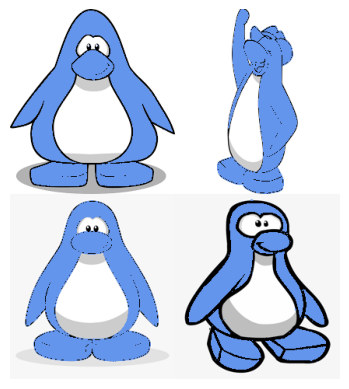

In [59]:
from PIL import Image
import matplotlib.pyplot as plt

img_flipped = result_img.transpose(Image.FLIP_LEFT_RIGHT)

img_flipped.save('pinguin_grupo_flipped.png')

plt.imshow(img_flipped)
plt.axis('off')
plt.show()


Parte 4: Recortar o Pinguim Favorito 


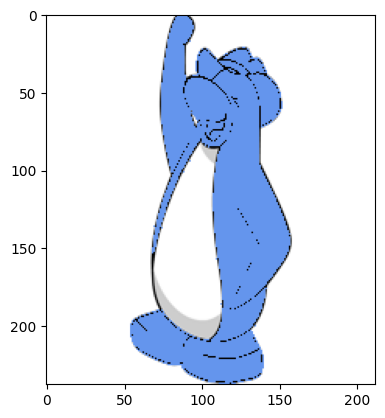

In [60]:

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image = np.array(img_flipped)

height, width, _ = image.shape

half_height = height // 2
half_width = width // 2

second = image[0:half_height, half_width:width]

second_img = Image.fromarray(second)

plt.imshow(second_img)

second_img.save('pinguim_selecionado.png')

Parte 5: Análise do Histograma e Escolha do Threshold (Optei pelo threshold de 150 com base na análise do histograma, que indicou uma grande concentração de pixels com intensidades abaixo desse valor. Essas áreas representam as partes mais escuras e sombreadas da imagem. 

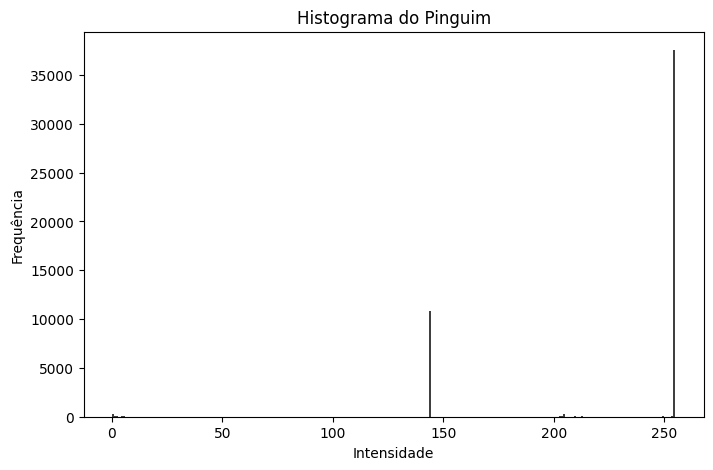

Intensidade mínima: 0, Intensidade máxima: 255


In [61]:
import numpy as np
import matplotlib.pyplot as plt

cropped_img = np.array(second_img.convert('L'))  

plt.figure(figsize=(8, 5))
plt.hist(cropped_img.flatten(), bins=256, range=(0, 255), color='black', alpha=0.75)
plt.title('Histograma do Pinguim')
plt.xlabel('Intensidade')
plt.ylabel('Frequência')
plt.show()

threshold = 150

print(f"Intensidade mínima: {cropped_img.min()}, Intensidade máxima: {cropped_img.max()}")


mascara = cropped_img < threshold  


Parte 6: Aplicar Threshold e Pintar com Cor Favorita


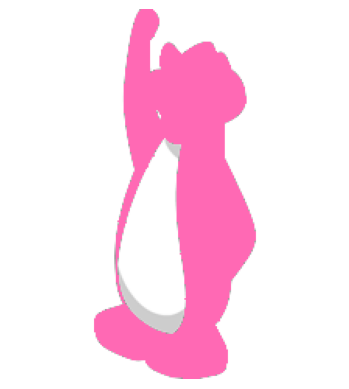

In [62]:
from PIL import Image

cor_rosa = [255, 105, 180] 
cropped_img_colorida = np.array(second_img.convert('RGB'))  
mascara = cropped_img < threshold 

cropped_img_colorida[mascara] = cor_rosa

resultado_final = Image.fromarray(cropped_img_colorida)

resultado_final.save('pinguim_selecionado_colorido.png')

plt.imshow(resultado_final)
plt.axis('off')
plt.show()
